<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2027%20-%20Fourier%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Your name here__
<br>
Date: Mar. 21, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 27: Fourier series</font></center>



## <font color=#46769B>Introduction</font>


The goals of this exercise are:
- Introduction to Fourier series

Required reading:
- *Lesson 12: Fourier series*




## <font color=#46769B>Exercise: Part (a) </font>

Consider a __driven damped harmonic oscillator__, with a driving function $F(t)$, governed by the second-order ODE

$$y''(t) + \gamma y'(t) + \omega_0^2 y(t) = F(t) \, , \qquad (1)$$

where $\omega_0$ is the intrinsic angular frequency of the oscillator and $\gamma$ is the damping coefficient. The oscillator is initially at rest at $t=0$, with initial condition

$$y(0) = 0 , \quad y'(0) = 0 \, .$$

We will consider a driving function that "turns on" for $t \ge 0$ and is given by a periodic triangular wave, shown here, with period $T=1$:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/triangular_wave.PNG" width="400">
</div>

The functional form of the wave is to be determined by you from this plot. Assume that $F(t)$ is linear except at its minima and maxima, and that it repeats henceforth for $t > 0$.

The goal of this exercise is to consider the response of the system, i.e., what is $y(t)$, for the driving function $F(t)$. Perform the following task:
- Define a function `F(t)` as a piecewise function to implement $F(t)$ according to the plot shown.
- Write a code that will solve Eq. (1) numerically, setting $\omega_0 = 0.6$, $\gamma=0.2$. The method, time interval, number of steps are up to you, but you must ensure that your results have converged at some level.  Solve for $y(t)$ for $t$ in the range $[0,20]$.





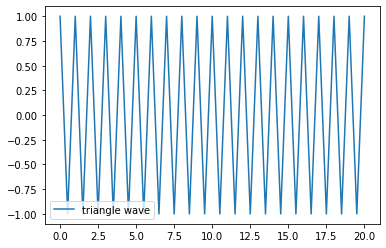

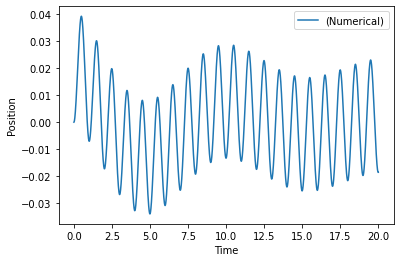

In [37]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,20,num=3000)
T = 1
omega_0 = 0.6 
gamma = 0.2 
num_steps = 3000
y_0 = 0 
t0 = 0
tf = 20
def F(t):
    if (t >= 0) & (t < T/2):
        return -4*t + 1
    elif (t >= T/2) & (t < T):
        return 4*t - 3
    elif t < 0:
        # Shift t up by one period
        return F(t+T)
    else:
        # Shift t down by one period
        return F(t-T)
    
f = np.vectorize(F)

 
def solve_ode( omega_0 , gamma):
  def g(t,y):
      y1, y2 = y
      return np.array([y2,F(t) -gamma*y2-omega_0**2*y1 ])

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1] - t[0]
    
  # initialize output
  y = np.zeros((num_steps+1,2))
  y[0] = [y_0,0]
    
  for i in range(num_steps):
        
    ti = t[i]
    yi = y[i]
        
    k1 = g(ti,yi) # Stage 1
    k2 = g(ti+0.5*h,yi+0.5*h*k1) # Stage 2
    k3 = g(ti+0.5*h,yi+0.5*h*k2) # Stage 3
    k4 = g(ti+h,yi+h*k3) # Stage 4
        
    # Final slope
    k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    y[i+1] = yi + h*k 
  return t , y


t,y = solve_ode(omega_0 , gamma)
position = y[:,0]
  
plt.plot(t,f(t),label='triangle wave')
plt.legend(loc = 'best')
plt.show()
plt.plot(t, position, label = '(Numerical)')
plt.ylabel('Position')
plt.xlabel('Time')
plt.legend(loc = 'best')
plt.show()

## <font color=#46769B>Exercise: Part (b) </font>

The Fourier coefficients for $F(t)$ are:

$$a_0 = 0 \, , \quad a_n = \left\{ \begin{array}{cc} \frac{8}{\pi^2 n^2} & {\rm for\; odd} \; n > 0 \\ 0 & {\rm for\; even} \; n > 0 \end{array} \right. , \quad b_n = 0 \, .$$

Perform the following tasks:
- With these Fourier coefficients, make a plot of the Fourier series for $F(t)$ vs $t$ for $t$ in the range $[0,2]$, truncating at $n_{\rm max} = 3$ and $n_{\rm max} = 15$. Show also your $F(t)$ from Part (a) on the same plot.

- Combining your Fourier series for $F(t)$ and your results from Exercise 26, code up and plot an analytic solution for $y(t)$ for both $n_{\rm max} = 3$ and $n_{\rm max} = 15$. Compare on the same plot your solution for $y(t)$ from Part (a).

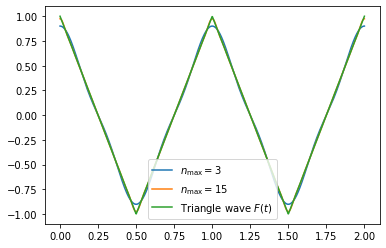

In [52]:
def Fourier_series(t, n_max):
    
    # First term (constant) in Fourier series
    a0 = 0
    m = a0
    
    # Sum over n > 0 terms in Fourier series
    for n in range(1,n_max+1,2):
      if n % 2 == 0:
        an = 0
        bn = 0
      else:
        an = 8/(np.pi**2 * n**2) 
        bn = 0
      m = m + an*np.cos(2*np.pi*n*t/T) + bn*np.sin(2*np.pi*n*t/T)
        
    return m
t_2 = np.linspace(0,2, 1000)
plt.plot(t_2,Fourier_series(t_2, 3),label=r'$n_{\rm max}=3$')
plt.plot(t_2,Fourier_series(t_2, 15),label=r'$n_{\rm max}=15$')
plt.plot(t_2, f(t_2), label=r'Triangle wave $F(t)$ ')


plt.legend()
plt.show()   

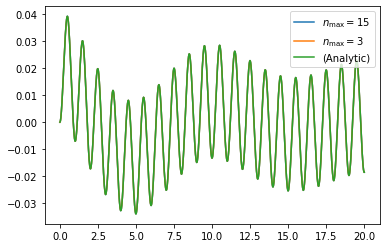

In [53]:
# n_max = 3
def solve_ode_2( omega_0 , gamma):
  def g(t,y):
      y1, y2 = y
      return np.array([y2,Fourier_series(t, 3) -gamma*y2-omega_0**2*y1 ])

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1] - t[0]
    
  # initialize output
  y = np.zeros((num_steps+1,2))
  y[0] = [y_0,0]
    
  for i in range(num_steps):
        
    ti = t[i]
    yi = y[i]
        
    k1 = g(ti,yi) # Stage 1
    k2 = g(ti+0.5*h,yi+0.5*h*k1) # Stage 2
    k3 = g(ti+0.5*h,yi+0.5*h*k2) # Stage 3
    k4 = g(ti+h,yi+h*k3) # Stage 4
        
    # Final slope
    k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    y[i+1] = yi + h*k 
  return t , y
t1, y1 = solve_ode_2(omega_0, gamma)
position1 = y1[:,0]
# n_max = 15 
def solve_ode_3( omega_0 , gamma):
  def g(t,y):
      y1, y2 = y
      return np.array([y2,Fourier_series(t, 15) -gamma*y2-omega_0**2*y1 ])

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1] - t[0]
    
  # initialize output
  y = np.zeros((num_steps+1,2))
  y[0] = [y_0,0]
    
  for i in range(num_steps):
        
    ti = t[i]
    yi = y[i]
        
    k1 = g(ti,yi) # Stage 1
    k2 = g(ti+0.5*h,yi+0.5*h*k1) # Stage 2
    k3 = g(ti+0.5*h,yi+0.5*h*k2) # Stage 3
    k4 = g(ti+h,yi+h*k3) # Stage 4
        
    # Final slope
    k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    y[i+1] = yi + h*k 
  return t , y
t2,y2 = solve_ode_3(omega_0, gamma)
position2 = y2[:,0]

# Plotting
plt.plot(t2, position2, label=r'$n_{\rm max}=15$' )
plt.plot(t1, position1, label=r'$n_{\rm max}=3$')
plt.plot(t, position, label = '(Analytic)')
plt.legend()
plt.show()
